## Modelling RRP Serial Robot

For forward kinematics, we try to compute the position of the end effector, given the joint position of the robot.The forward kinematics of the RRP robot can be expressed as:

$$
\begin{bmatrix}
x \\
y \\
z
\end{bmatrix}
= f(q_1, q_2, q_3)
$$

where $q_1$, $q_2$ are the revolute joint angles, and $q_3$ is the prismatic joint displacement.


In [1]:
import numpy as np
from sympy import symbols, cos, sin, pi, Matrix, solve
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Define symbols
q1, q2, q3 = symbols('q1 q2 q3')

In [3]:
# Define DH parameters
d = [0, 0, 0, 0]
alpha = [-pi/2, -pi/2, -pi/2, 0]
theta = [q1 - pi/2, q2 - pi/2, -pi/2, 0]
r = [0, 0, q3, 0]

In [4]:
# Define the transformation matrix function
def dh_matrix(d, r, alpha, theta):
    return Matrix([
        [cos(theta), -sin(theta), 0, d],
        [sin(theta)*cos(alpha), cos(theta)*cos(alpha), -sin(alpha), -r*sin(alpha)],
        [sin(theta)*sin(alpha), cos(theta)*sin(alpha), cos(alpha), r*cos(alpha)],
        [0, 0, 0, 1]
    ])

In [5]:
# Compute individual transformations
T_1_0 = dh_matrix(d[0], r[0], alpha[0], theta[0])
T_2_1 = dh_matrix(d[1], r[1], alpha[1], theta[1])
T_3_2 = dh_matrix(d[2], r[2], alpha[2], theta[2])
T_4_3 = dh_matrix(d[3], r[3], alpha[3], theta[3])


In [6]:
# Compute the final transformation
T_4_0 = T_1_0 * T_2_1 * T_3_2 * T_4_3


In [7]:
T_4_0

Matrix([
[ cos(q1), sin(q1)*sin(q2), sin(q1)*cos(q2), q3*sin(q1)*cos(q2)],
[       0,         cos(q2),        -sin(q2),        -q3*sin(q2)],
[-sin(q1), sin(q2)*cos(q1), cos(q1)*cos(q2), q3*cos(q1)*cos(q2)],
[       0,               0,               0,                  1]])

In [8]:
print('x = ', T_4_0[0,3])
print('y = ', T_4_0[0,1])
print('z = ', T_4_0[0,2])

x =  q3*sin(q1)*cos(q2)
y =  sin(q1)*sin(q2)
z =  sin(q1)*cos(q2)


The inverse kinematics is exactly something opposite that of forward kinematics. Here for a given position of the end effector, we try to compute the pose of the robot. The inverse kinematics of the RRP robot can be expressed as:

$$
\begin{bmatrix}
q_1 \\
q_2 \\
q_3
\end{bmatrix}
= f^{-1}(x, y, z)
$$



In [9]:
# Write your poses here 
# pose = [x, y, z]
pose1 = [0, 0, 4]
pose2 = [3, 0, 0]
pose3 = [3, 3, 0]
pose4 = [-3.3, 0, 0]


# Select the pose here
pose = pose3


In [10]:
x, y, z = pose
equations = (T_4_0[0, 3] - pose[0], T_4_0[1, 3] - pose[1], T_4_0[2, 3] - pose[2])
solution = solve(equations, (q1, q2, q3))

# Print the solutions of IKM
print(f"Solution for the selected pose is: {solution}")
    
    

Solution for the selected pose is: [(pi/2, -pi/4, 3*sqrt(2)), (pi/2, 3*pi/4, -3*sqrt(2)), (3*pi/2, -3*pi/4, 3*sqrt(2)), (3*pi/2, pi/4, -3*sqrt(2))]


In [11]:
# 4 Transformation matrices for the selected pose
for i in range(4):
    q1 = solution[i][0]
    q2 = solution[i][1]
    q3 = solution[i][2]

    # Define DH parameters
    d = [0, 0, 0, 0]
    alpha = [-pi/2, -pi/2, -pi/2, 0]
    theta = [q1 - pi/2, q2 - pi/2, -pi/2, 0]
    r = [0, 0, q3, 0]

    # Compute the DKM
    T_1_0 = dh_matrix(d[0], r[0], alpha[0], theta[0])
    T_2_1 = dh_matrix(d[1], r[1], alpha[1], theta[1])
    T_3_2 = dh_matrix(d[2], r[2], alpha[2], theta[2])
    T_4_3 = dh_matrix(d[3], r[3], alpha[3], theta[3])
    T = T_1_0 * T_2_1 * T_3_2 * T_4_3

    print(f"The Transformation matrix for solution {i} is : {T}")
   

The Transformation matrix for solution 0 is : Matrix([[0, -sqrt(2)/2, sqrt(2)/2, 3], [0, sqrt(2)/2, sqrt(2)/2, 3], [-1, 0, 0, 0], [0, 0, 0, 1]])
The Transformation matrix for solution 1 is : Matrix([[0, sqrt(2)/2, -sqrt(2)/2, 3], [0, -sqrt(2)/2, -sqrt(2)/2, 3], [-1, 0, 0, 0], [0, 0, 0, 1]])
The Transformation matrix for solution 2 is : Matrix([[0, sqrt(2)/2, sqrt(2)/2, 3], [0, -sqrt(2)/2, sqrt(2)/2, 3], [1, 0, 0, 0], [0, 0, 0, 1]])
The Transformation matrix for solution 3 is : Matrix([[0, -sqrt(2)/2, -sqrt(2)/2, 3], [0, sqrt(2)/2, -sqrt(2)/2, 3], [1, 0, 0, 0], [0, 0, 0, 1]])


### Verification of the Inverse Kinematic Solution

The inverse kinematic solution can be verified by comparing the first three rows of the last column of the transformation matrices with the desired end-effector coordinates ($x_{ee}, y_{ee}, z_{ee}$). If these values match, it confirms that the inverse kinematics are computed correctly and the solution is valid.


### Visualization

<IPython.core.display.Javascript object>


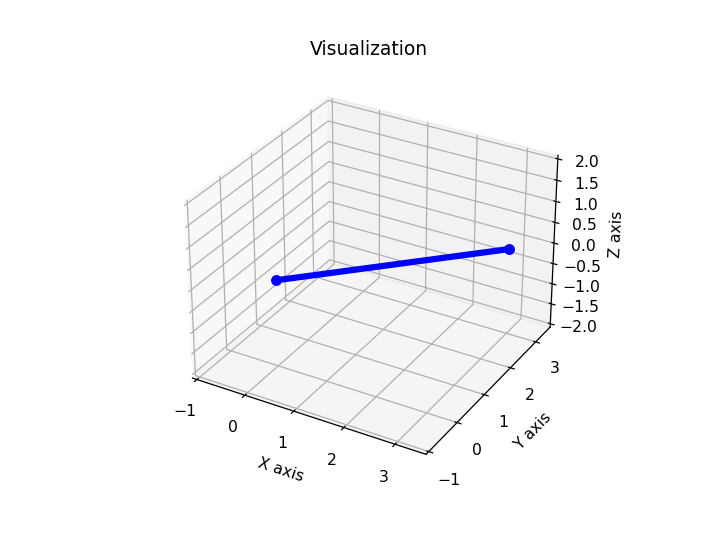

In [12]:

plt.ion()

# Traget pose
x_target = pose[0]
y_target = pose[1]
z_target = pose[2]

# Initial joint configurations
initial_config = [0, 0, 0]

# The solution number you want to see
i = 0  # i is between 0 and 3
q1_target = float(solution[i][0])
q2_target = float(solution[i][1])
q3_target = float(solution[i][2])

# Target joint configuration
target_config = [q1_target, q2_target, q3_target]

# Initialize the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Line for the robot arm
line, = ax.plot([], [], [], 'b-o', lw=4)

# Number of interpolation steps
num_steps = 100

# Interpolate between the initial [0, 0, 0] and target configuration
interpolated_configs = np.linspace(initial_config, target_config, num_steps)

tolerance = 0.01  # Small value to determine when to stop the animation

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    return line

def update(frame):
    # Get current configuration from interpolation
    q1, q2, q3 = interpolated_configs[frame]

    # Forward kinematics: calculate the positions
    x = q3 * np.sin(q1) * np.cos(q2)  
    y = -q3 * np.sin(q2)              
    z = q3 * np.cos(q1) * np.cos(q2)  

    # Update the line data 
    line.set_data([0, x], [0, y])
    line.set_3d_properties([0, z])

    distance_to_target = np.sqrt((x - x_target)**2 + (y - y_target)**2 + (z - z_target)**2)

    if distance_to_target < tolerance:
        ani.event_source.stop()

    return line

# Setting up the animation
ani = animation.FuncAnimation(fig, update, frames=num_steps, init_func=init, blit=True, interval=50)

# Setting labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Visualization')

# Enable plot rotation with the cursor
ax.mouse_init()

ax.set_xlim([-1, 3.5])
ax.set_ylim([-1, 3.5])
ax.set_zlim([-2, 2])
plt.show()


### Workspace Analysis

The workspace can be visualized by plotting the end-effector positions using the forward kinematics formulations of the robot. There will be joint limits ($q_{min}, q_{max}$) for the 3 joints ($q_{1}, q_{2}, q_{3}$) and for different joint positions, we will be calculating the position of the end-effector. The positions plotted in the 3D graph will yield the workspace. For visual simplicity, the length of the prismatic joint is kept fixed.


<IPython.core.display.Javascript object>


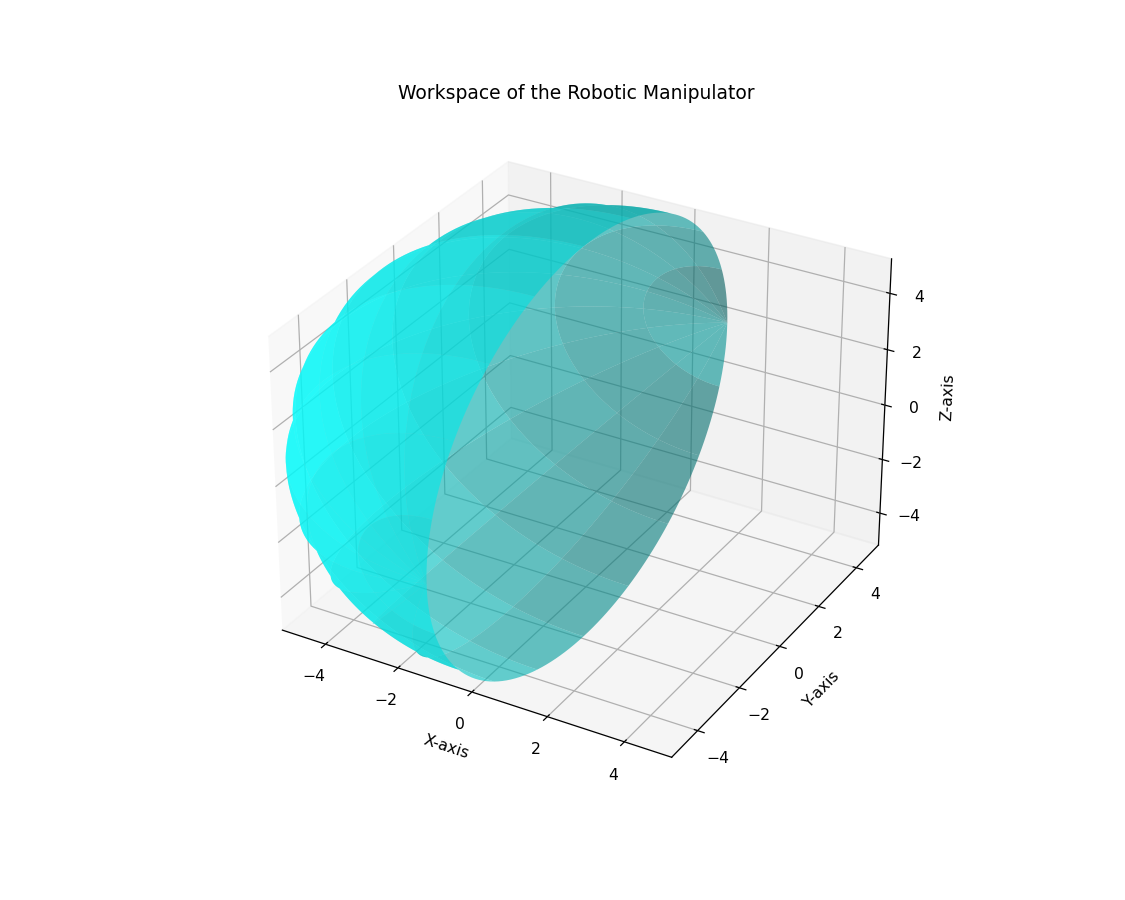

In [13]:

# Define the range for q1, q2, and a fixed q3
q1_range = np.linspace(0, - np.pi, 100)  # Joint 1 range
q2_range = np.linspace(-np.pi / 2, np.pi / 2, 100)  # Joint 2 range
q3 = 7  # Fixed length of the arm 

# Create a meshgrid for q1 and q2
Q1, Q2 = np.meshgrid(q1_range, q2_range)

# Calculate the workspace coordinates
X = q3 * np.sin(Q1) * np.cos(Q2)
Y = -q3 * np.sin(Q2)
Z = q3 * np.cos(Q1) * np.cos(Q2)

# Plot the workspace
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, alpha=0.6, rstride=10, cstride=10, color='cyan')

# Set labels
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('Workspace of the Robotic Manipulator')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlim([-5, 5])

plt.show()
